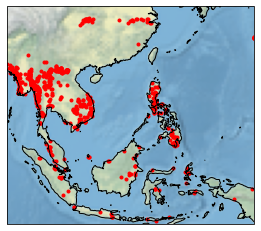

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point, Polygon

data=gpd.read_file(r"./data/MODIS_C6_SouthEast_Asia_24h/MODIS_C6_SouthEast_Asia_24h.shp")
csv=pd.read_csv(r"./data/MODIS_C6_SouthEast_Asia_24h.csv")

# -- use csv -- 
lon = np.array(csv['longitude'].values)
lat = np.array(csv['latitude'].values)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())

ax.scatter(lon, lat, marker=".",c="red")

ax.stock_img()
ax.coastlines()

extent = [min(lon),max(lon),min(lat),max(lat)]
ax.set_extent(extent)

plt.show()

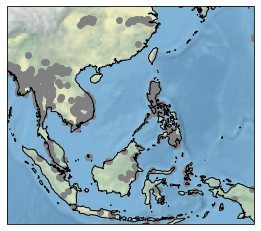

In [10]:
# -- use shp -- 
lon = np.array(data['LONGITUDE'].values)
lat = np.array(data['LATITUDE'].values)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1,projection=ccrs.PlateCarree())

data.plot(ax=ax, facecolor='gray')

ax.stock_img()
ax.coastlines()

extent = [min(lon),max(lon),min(lat),max(lat)]
ax.set_extent(extent)

plt.show()

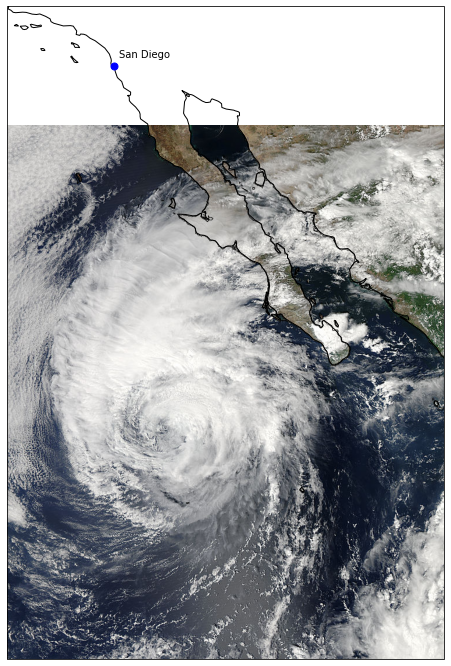

In [7]:
# -- use jpg -- 
os.system("wget https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg")

fig = plt.figure(figsize=(8, 12))

# this is from the cartopy docs
fname = 'Miriam.A2012270.2050.2km.jpg'
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)
img = plt.imread(fname)

ax = plt.axes(projection=ccrs.PlateCarree())

# set a margin around the data
ax.set_xmargin(0.05)
ax.set_ymargin(0.10)

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

plt.show()